# **Case Study Think Tank**

**Masoumeh Shariat**




In this notebook, the datasets are described, cleaned, and analyzed in order to find consumer behavior.(Task1. parts:1,2,3)

**Import Libraries**

In [69]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()



# **Load the Data**


In [70]:
department=pd.read_csv("departments.csv")
order_products=pd.read_csv("order_products.csv")
orders=pd.read_csv("orders.csv")
products=pd.read_csv("products.csv")

**All columns in the datasets**

department_id	
department: It is the name of department

product_id   
product_name                                               
order_id	
add_to_cart_order: ordering to add the product to the card   

reordered: Indicates whether the product has already been ordered (1 or 0)  
user_id	
order_number: The number of order	
order_dow	: The day of the week 
order_hour_of_day: The hour of the day

days_since_prior_order: The time difference between two last orders





In [71]:
department.head(3)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery


In [72]:
department.shape

(21, 2)

In [73]:
products.head(3)

,product_id,department_id,product_name
0,61,19,cookies cakes
1,104,13,spices seasonings
2,94,7,tea


In [74]:
products.shape

(134, 3)

In [75]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     134 non-null    int64 
 1   department_id  134 non-null    int64 
 2   product_name   134 non-null    object
dtypes: int64(2), object(1)
memory usage: 3.3+ KB


In [76]:
order_products.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,10,24,1,1
1,10,83,2,1
2,10,16,3,0


In [77]:
order_products.shape

(2019501, 4)

In [78]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 61.6 MB


In [79]:
orders.head(3)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2425083,49125,1,2,18,NaN
1,1944304,162867,1,3,17,NaN
2,1201011,147243,14,0,16,3.0


In [80]:
orders.shape

(200000, 6)

In [81]:
orders.isnull().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    12254
dtype: int64

In [82]:
orders=orders.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) 
orders.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [83]:
orders.shape

(187746, 6)

**Merge dataframes**

In [84]:
dataset=pd.merge(pd.merge(pd.merge(order_products,orders,on="order_id"),
                products,on="product_id"),department,on="department_id")
del order_products, orders,products,department
dataset.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,department_id,product_name,department
0,10,24,1,1,135442,4,6,8,8.0,4,fresh fruits,produce
1,10,24,4,1,135442,4,6,8,8.0,4,fresh fruits,produce
2,10,24,7,1,135442,4,6,8,8.0,4,fresh fruits,produce
3,28,24,4,1,98256,29,3,13,6.0,4,fresh fruits,produce
4,28,24,6,1,98256,29,3,13,6.0,4,fresh fruits,produce


In [85]:
dataset.describe()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,department_id
count,1.895159e+06,1.895159e+06,1.895159e+06,1.895159e+06,1.895159e+06,1.895159e+06,1.895159e+06,1.895159e+06,1.895159e+06,1.895159e+06
mean,1.707264e+06,7.119710e+01,8.365059e+00,6.284359e-01,1.030471e+05,1.821107e+01,2.735071e+00,1.342840e+01,1.138603e+01,9.931839e+00
std,9.861375e+05,3.821248e+01,7.158381e+00,4.832229e-01,5.946256e+04,1.758028e+01,2.092352e+00,4.243730e+00,8.970980e+00,6.283028e+00
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,8.526620e+05,3.100000e+01,3.000000e+00,0.000000e+00,5.162500e+04,6.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,4.000000e+00
50%,1.705092e+06,8.300000e+01,6.000000e+00,1.000000e+00,1.026170e+05,1.200000e+01,3.000000e+00,1.300000e+01,8.000000e+00,9.000000e+00
75%,2.560343e+06,1.070000e+02,1.100000e+01,1.000000e+00,1.545240e+05,2.500000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.600000e+01
max,3.421080e+06,1.340000e+02,1.370000e+02,1.000000e+00,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,2.100000e+01


In [104]:
from google.colab import drive
drive.mount('/drive')
dataset.to_csv('/drive/My Drive/BMW_Task/dataset.csv') 

Mounted at /drive


# **Exploratory Data Analysis(EDA)**

In [87]:
print (" Number of Costumers is", len(dataset.user_id.unique()) ,"\n",
       "Number of Products is", len(dataset.product_id.unique()),"\n",
       "Number of Orders is",len(dataset),"\n",
       "Number of Departments is",len(dataset.department_id.unique())) 

 Number of Costumers is 98918 
 Number of Products is 134 
 Number of Orders is 1895159 
 Number of Departments is 21


**Table 1:**  The number of orders of each product.









In [88]:
dataset.groupby('product_name')['order_number'].count().sort_values(ascending=False).to_frame('Count')[1:10].reset_index()

,product_name,Count
0,fresh vegetables,199526
1,packaged vegetables fruits,103016
2,yogurt,85176
3,packaged cheese,57683
4,milk,52154
5,water seltzer sparkling water,49679
6,chips pretzels,42498
7,soy lactosefree,37098
8,bread,34123


**Table 2:** The number of orders of each department.


In [89]:
dataset.groupby('department')['order_number'].count().sort_values(ascending=False).to_frame('Count')[1:10].reset_index()

,department,Count
0,dairy eggs,316966
1,snacks,169855
2,beverages,158100
3,frozen,130049
4,pantry,108800
5,bakery,68430
6,canned goods,61844
7,deli,60934
8,dry goods pasta,50475


**Table 3:** The ratio of reordered products by costumers.



In [90]:
dataset.groupby("reordered")["order_id"].count().to_frame('Count')


,Count
reordered,
0,704173
1,1190986


**Table 4:** Which products customers buy again?




In [91]:
dataset.groupby('product_name')['reordered'].sum().sort_values(ascending=False).to_frame('number_of_times_reordered')[1:10].reset_index()

,product_name,number_of_times_reordered
0,fresh vegetables,126171
1,packaged vegetables fruits,69872
2,yogurt,62464
3,milk,43162
4,water seltzer sparkling water,38467
5,packaged cheese,35864
6,soy lactosefree,27251
7,chips pretzels,26615
8,bread,24540


**Table 4:** Which product is put into the cart first ?

In [92]:
card=dataset[["add_to_cart_order","product_name"]]
card=card.loc[card['add_to_cart_order'].isin(['1'])]
card.drop_duplicates().reset_index()[1:10]

,index,add_to_cart_order,product_name
1,213233,1,fresh vegetables
2,412824,1,fresh herbs
3,434601,1,packaged vegetables fruits
4,537616,1,packaged produce
5,553947,1,baby food formula
6,576131,1,diapers wipes
7,577607,1,baby bath body care
8,578079,1,baby accessories
9,578557,1,canned meals beans


**Plot 1:** Where do customers buy most?

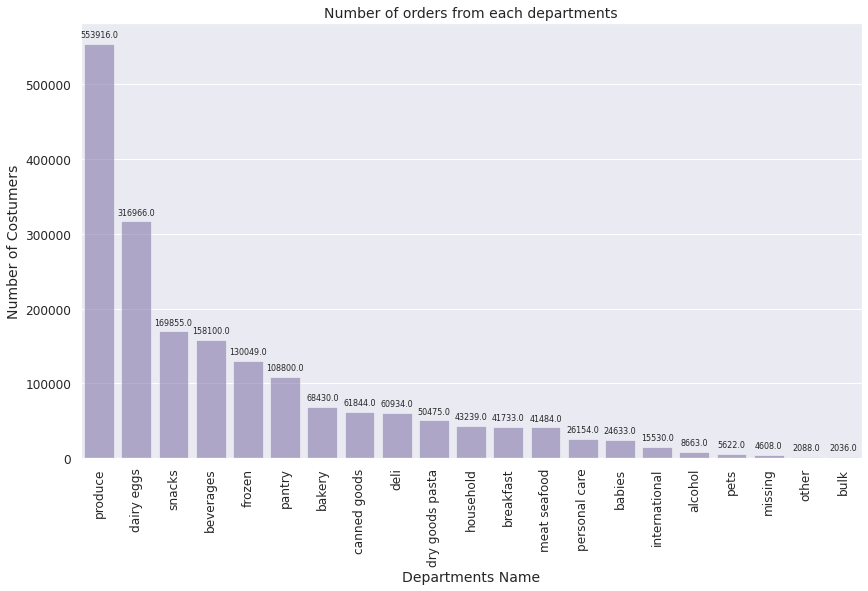

In [93]:
places=dataset.groupby("department")["user_id"].count().reset_index()

sns.set(font_scale = 1.1)
plt.figure(figsize=(14,8))
splot=sns.barplot(places["department"], places["user_id"],
            order=places.sort_values(by="user_id", ascending=False).department
            , alpha=0.6,linewidth=0.8,color=color[4])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',size=8)

plt.title('Number of orders from each departments',size=14)
plt.xlabel('Departments Name',size=14)
plt.ylabel('Number of Costumers',size=14)
plt.xticks(rotation = 'vertical',)
plt.show()


**Plot 2:** When do costumer often purchase?

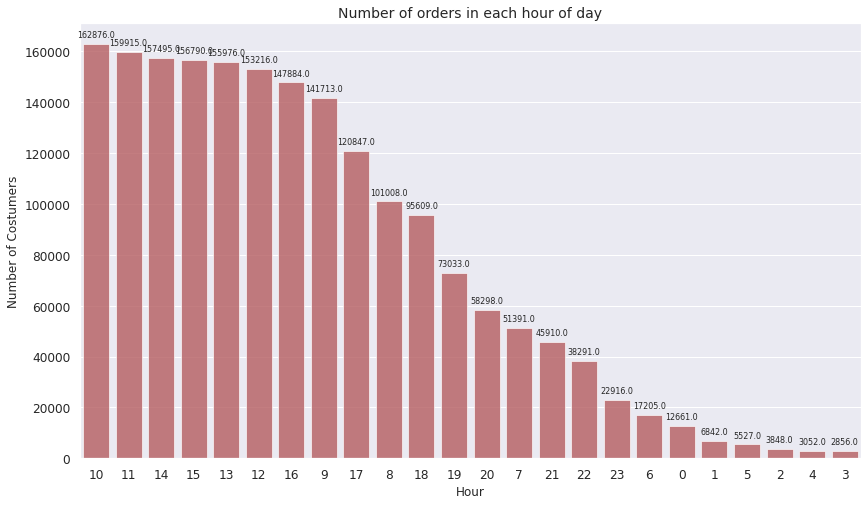

In [94]:
hour_of_day=dataset.groupby("order_hour_of_day")["user_id"].count().reset_index()


plt.figure(figsize=(14,8))
splot=sns.barplot(hour_of_day["order_hour_of_day"], hour_of_day["user_id"],
            order=hour_of_day.sort_values(by="user_id", ascending=False).order_hour_of_day, 
            alpha=0.8,linewidth=0.8, color=color[3])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',size=8)

plt.title('Number of orders in each hour of day',size=14)
plt.xlabel('Hour',size=12)
plt.ylabel('Number of Costumers',size=12)
plt.show()

**Plot 3:** Order rate on different days and hours.

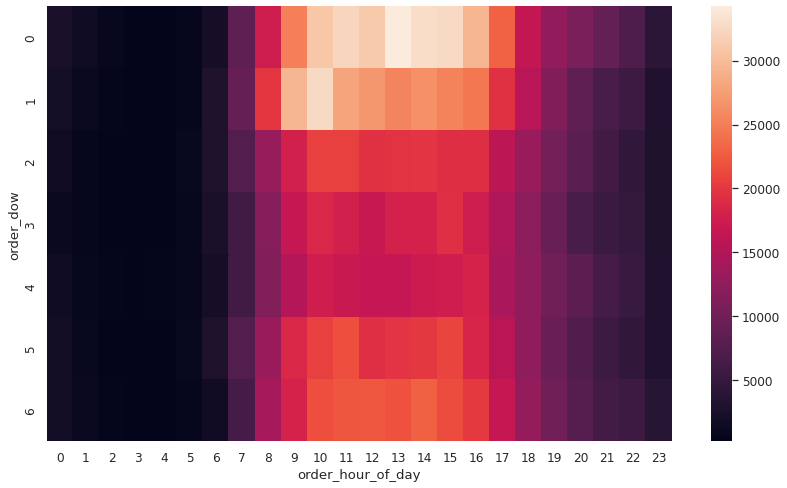

<Figure size 1008x576 with 0 Axes>

In [95]:
plt.figure(figsize=(14,8))

sns.heatmap(dataset.groupby(["order_dow", "order_hour_of_day"])["user_id"].aggregate("count").reset_index().pivot("order_dow", "order_hour_of_day","user_id" ))
plt.figure(figsize=(14,8))
plt.show()

**Plot 4:** When do customers often purchase again?

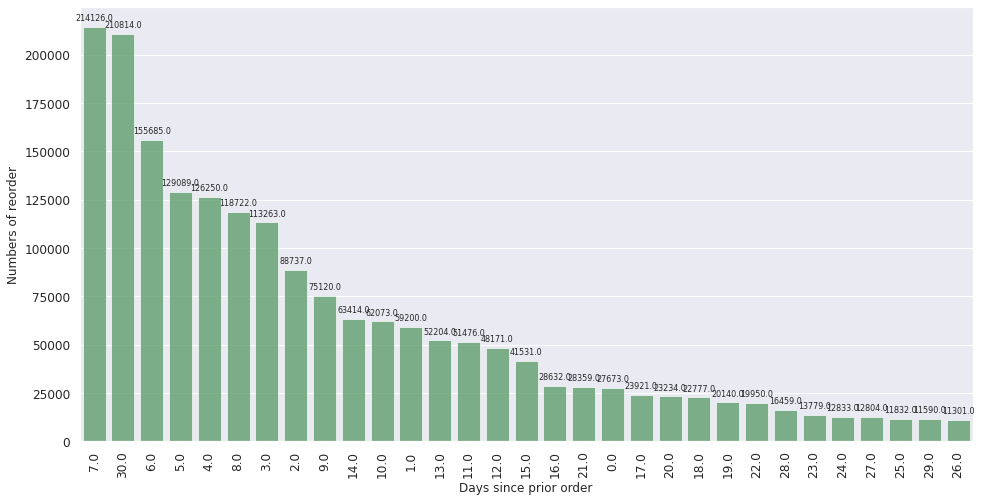

In [96]:
prior_order=dataset.groupby("days_since_prior_order")["user_id"].count().reset_index()

plt.figure(figsize=(16,8))
splot=sns.barplot(prior_order["days_since_prior_order"], prior_order["user_id"],
            order=prior_order.sort_values(by="user_id", ascending=False).days_since_prior_order, 
            alpha=0.8,linewidth=0.8, color=color[2])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',size=8)


plt.ylabel('Numbers of reorder', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

**Table 5:** What are the categories and products the customers are most interested in?

In [97]:
dataset.groupby(["product_name","department"])["order_number"].count().sort_values(ascending=False).to_frame('number_of_orders').reset_index().head(10)


,product_name,department,number_of_orders
0,fresh fruits,produce,213224
1,fresh vegetables,produce,199526
2,packaged vegetables fruits,produce,103016
3,yogurt,dairy eggs,85176
4,packaged cheese,dairy eggs,57683
5,milk,dairy eggs,52154
6,water seltzer sparkling water,beverages,49679
7,chips pretzels,snacks,42498
8,soy lactosefree,dairy eggs,37098
9,bread,bakery,34123


# **Experimental Resalts**

* **Fresh vegetables** and **packaged vegetable fruits** are products that have been ordered 199526 and 103016 times. And also re-ordered 126171 and 69872 times. In addition, they were always added to the card earlier than other products. Overall, about 63% of the ordered products were re-ordered.

* **Produce** is the largest department, so customers buy most products from this department (306098 times).

* Most orders were performed on **Saturdays** and **Sundays** between **9:00 and 17:00.**

* The number of customers that reordered after **7 days** is the most.

* Customers were most **interested in** fresh fruits.	

